In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(526.4932)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 551.36279  validloss 864.62888±0.00000  bestvalidloss 864.62888  last_update 0
train: iter 1  trainloss 228.96900  validloss 275.37786±0.00000  bestvalidloss 275.37786  last_update 0
train: iter 2  trainloss -181.96004  validloss -3.64300±0.00000  bestvalidloss -3.64300  last_update 0
train: iter 3  trainloss -393.42669  validloss -341.58264±0.00000  bestvalidloss -341.58264  last_update 0
train: iter 4  trainloss -589.55358  validloss -627.14715±0.00000  bestvalidloss -627.14715  last_update 0
train: iter 5  trainloss -707.21995  validloss -651.58288±0.00000  bestvalidloss -651.58288  last_update 0
train: iter 6  trainloss -812.84519  validloss -791.46262±0.00000  bestvalidloss -791.46262  last_update 0
train: iter 7  trainloss -901.49039  validloss -969.38331±0.00000  bestvalidloss -969.38331  last_update 0
train: iter 8  trainloss -960.64626  validloss -1070.19966±0.00000  bestvalidloss -1070.19966  last_update 0
train: iter 9  trainloss -

train: iter 75  trainloss -1539.62077  validloss -1763.51031±0.00000  bestvalidloss -1819.50484  last_update 6
train: iter 76  trainloss -1453.67689  validloss -1559.54752±0.00000  bestvalidloss -1819.50484  last_update 7
train: iter 77  trainloss -1727.11617  validloss -1781.41733±0.00000  bestvalidloss -1819.50484  last_update 8
train: iter 78  trainloss -1751.96500  validloss -1832.30306±0.00000  bestvalidloss -1832.30306  last_update 0
train: iter 79  trainloss -1747.48000  validloss -1847.18004±0.00000  bestvalidloss -1847.18004  last_update 0
train: iter 80  trainloss -1727.75532  validloss -1853.57812±0.00000  bestvalidloss -1853.57812  last_update 0
train: iter 81  trainloss -1726.33644  validloss -1756.93260±0.00000  bestvalidloss -1853.57812  last_update 1
train: iter 82  trainloss -1753.00437  validloss -1866.12921±0.00000  bestvalidloss -1866.12921  last_update 0
train: iter 83  trainloss -1729.26043  validloss -1853.03549±0.00000  bestvalidloss -1866.12921  last_update 1
t

train: iter 149  trainloss -1627.47826  validloss -1934.37549±0.00000  bestvalidloss -1981.16287  last_update 17
train: iter 150  trainloss -1715.93441  validloss -1858.58333±0.00000  bestvalidloss -1981.16287  last_update 18
train: iter 151  trainloss -1822.72518  validloss -1909.61822±0.00000  bestvalidloss -1981.16287  last_update 19
train: iter 152  trainloss -1904.60151  validloss -1977.12392±0.00000  bestvalidloss -1981.16287  last_update 20
train: iter 153  trainloss -1885.55883  validloss -1977.63222±0.00000  bestvalidloss -1981.16287  last_update 21
train: iter 154  trainloss -1763.25123  validloss -1862.11285±0.00000  bestvalidloss -1981.16287  last_update 22
train: iter 155  trainloss -1764.42841  validloss -1249.17041±0.00000  bestvalidloss -1981.16287  last_update 23
train: iter 156  trainloss -1885.15431  validloss -1883.66042±0.00000  bestvalidloss -1981.16287  last_update 24
train: iter 157  trainloss -1888.99631  validloss -1965.26451±0.00000  bestvalidloss -1981.16287

train: iter 223  trainloss -1931.76938  validloss -1978.37260±0.00000  bestvalidloss -2020.94882  last_update 6
train: iter 224  trainloss -1894.89166  validloss -1942.53503±0.00000  bestvalidloss -2020.94882  last_update 7
train: iter 225  trainloss -1867.75664  validloss -1994.81476±0.00000  bestvalidloss -2020.94882  last_update 8
train: iter 226  trainloss -1834.19804  validloss -1958.48113±0.00000  bestvalidloss -2020.94882  last_update 9
train: iter 227  trainloss -1947.06652  validloss -2008.31588±0.00000  bestvalidloss -2020.94882  last_update 10
train: iter 228  trainloss -1934.28533  validloss -1979.27401±0.00000  bestvalidloss -2020.94882  last_update 11
train: iter 229  trainloss -1916.85249  validloss -2022.42882±0.00000  bestvalidloss -2022.42882  last_update 0
train: iter 230  trainloss -1947.95142  validloss -2013.37896±0.00000  bestvalidloss -2022.42882  last_update 1
train: iter 231  trainloss -1953.29302  validloss -2020.44449±0.00000  bestvalidloss -2022.42882  last

train: iter 297  trainloss -1978.43035  validloss -2042.81036±0.00000  bestvalidloss -2061.64431  last_update 7
train: iter 298  trainloss -1959.34484  validloss -2031.88962±0.00000  bestvalidloss -2061.64431  last_update 8
train: iter 299  trainloss -1806.60224  validloss -1976.59122±0.00000  bestvalidloss -2061.64431  last_update 9
train: iter 300  trainloss -1898.53832  validloss -1978.73196±0.00000  bestvalidloss -2061.64431  last_update 10
train: iter 301  trainloss -1986.82449  validloss -2052.79636±0.00000  bestvalidloss -2061.64431  last_update 11
train: iter 302  trainloss -1934.78255  validloss -1983.35406±0.00000  bestvalidloss -2061.64431  last_update 12
train: iter 303  trainloss -1961.66419  validloss -2050.28568±0.00000  bestvalidloss -2061.64431  last_update 13
train: iter 304  trainloss -1990.51385  validloss -2029.31945±0.00000  bestvalidloss -2061.64431  last_update 14
train: iter 305  trainloss -1964.75298  validloss -1948.13641±0.00000  bestvalidloss -2061.64431  l

train: iter 370  trainloss -1996.22705  validloss -2053.80816±0.00000  bestvalidloss -2080.21108  last_update 5
train: iter 371  trainloss -2003.76890  validloss -2050.79020±0.00000  bestvalidloss -2080.21108  last_update 6
train: iter 372  trainloss -2031.39247  validloss -2054.59405±0.00000  bestvalidloss -2080.21108  last_update 7
train: iter 373  trainloss -2035.44064  validloss -2093.54438±0.00000  bestvalidloss -2093.54438  last_update 0
train: iter 374  trainloss -2018.86660  validloss -2028.04357±0.00000  bestvalidloss -2093.54438  last_update 1
train: iter 375  trainloss -1907.86697  validloss -2060.19828±0.00000  bestvalidloss -2093.54438  last_update 2
train: iter 376  trainloss -1981.20519  validloss -2024.22914±0.00000  bestvalidloss -2093.54438  last_update 3
train: iter 377  trainloss -1972.38992  validloss -2051.74603±0.00000  bestvalidloss -2093.54438  last_update 4
train: iter 378  trainloss -1983.78382  validloss -2052.52623±0.00000  bestvalidloss -2093.54438  last_u

train: iter 443  trainloss -2039.11465  validloss -2067.87890±0.00000  bestvalidloss -2093.54438  last_update 70
train: iter 444  trainloss -2043.69440  validloss -2078.63268±0.00000  bestvalidloss -2093.54438  last_update 71
train: iter 445  trainloss -2042.36400  validloss -2063.48589±0.00000  bestvalidloss -2093.54438  last_update 72
train: iter 446  trainloss -1976.07524  validloss -2071.34929±0.00000  bestvalidloss -2093.54438  last_update 73
train: iter 447  trainloss -1912.74119  validloss -1963.73262±0.00000  bestvalidloss -2093.54438  last_update 74
train: iter 448  trainloss -1998.80153  validloss -1993.78469±0.00000  bestvalidloss -2093.54438  last_update 75
train: iter 449  trainloss -2024.92590  validloss -2089.13629±0.00000  bestvalidloss -2093.54438  last_update 76
train: iter 450  trainloss -2028.40587  validloss -2071.52069±0.00000  bestvalidloss -2093.54438  last_update 77
train: iter 451  trainloss -2020.83161  validloss -2054.07672±0.00000  bestvalidloss -2093.54438

train: iter 516  trainloss -2061.55941  validloss -2093.26593±0.00000  bestvalidloss -2104.38922  last_update 37
train: iter 517  trainloss -1686.37771  validloss -2048.93240±0.00000  bestvalidloss -2104.38922  last_update 38
train: iter 518  trainloss -2001.35028  validloss -2088.09271±0.00000  bestvalidloss -2104.38922  last_update 39
train: iter 519  trainloss -2048.07777  validloss -2060.56155±0.00000  bestvalidloss -2104.38922  last_update 40
train: iter 520  trainloss -2064.16832  validloss -2088.43002±0.00000  bestvalidloss -2104.38922  last_update 41
train: iter 521  trainloss -2062.00483  validloss -2058.73012±0.00000  bestvalidloss -2104.38922  last_update 42
train: iter 522  trainloss -1976.01316  validloss -2071.84955±0.00000  bestvalidloss -2104.38922  last_update 43
train: iter 523  trainloss -2040.83854  validloss -2070.56884±0.00000  bestvalidloss -2104.38922  last_update 44
train: iter 524  trainloss -2060.93139  validloss -2071.67880±0.00000  bestvalidloss -2104.38922

train: iter 589  trainloss -2078.18987  validloss -2099.59876±0.00000  bestvalidloss -2116.28226  last_update 2
train: iter 590  trainloss -2077.28506  validloss -2092.78729±0.00000  bestvalidloss -2116.28226  last_update 3
train: iter 591  trainloss -2073.19709  validloss -2100.17595±0.00000  bestvalidloss -2116.28226  last_update 4
train: iter 592  trainloss -2070.36600  validloss -2091.84474±0.00000  bestvalidloss -2116.28226  last_update 5
train: iter 593  trainloss -2091.15921  validloss -2081.23862±0.00000  bestvalidloss -2116.28226  last_update 6
train: iter 594  trainloss -2089.43470  validloss -2081.26072±0.00000  bestvalidloss -2116.28226  last_update 7
train: iter 595  trainloss -1800.03160  validloss -2080.72086±0.00000  bestvalidloss -2116.28226  last_update 8
train: iter 596  trainloss -2024.18975  validloss -1947.70263±0.00000  bestvalidloss -2116.28226  last_update 9
train: iter 597  trainloss -2087.42208  validloss -2114.14131±0.00000  bestvalidloss -2116.28226  last_u

train: iter 662  trainloss -2094.63521  validloss -2098.53530±0.00000  bestvalidloss -2125.64499  last_update 1
train: iter 663  trainloss -2086.76602  validloss -2091.95135±0.00000  bestvalidloss -2125.64499  last_update 2
train: iter 664  trainloss -2053.93548  validloss -2102.78506±0.00000  bestvalidloss -2125.64499  last_update 3
train: iter 665  trainloss -2035.69176  validloss -1923.09496±0.00000  bestvalidloss -2125.64499  last_update 4
train: iter 666  trainloss -2094.64770  validloss -2065.96882±0.00000  bestvalidloss -2125.64499  last_update 5
train: iter 667  trainloss -2095.70400  validloss -2091.83514±0.00000  bestvalidloss -2125.64499  last_update 6
train: iter 668  trainloss -2088.23960  validloss -2081.11942±0.00000  bestvalidloss -2125.64499  last_update 7
train: iter 669  trainloss -1994.96795  validloss -2011.31787±0.00000  bestvalidloss -2125.64499  last_update 8
train: iter 670  trainloss -2072.25503  validloss -2077.00792±0.00000  bestvalidloss -2125.64499  last_u

train: iter 735  trainloss -2040.78595  validloss -2067.59678±0.00000  bestvalidloss -2128.85678  last_update 22
train: iter 736  trainloss -2037.29284  validloss -2105.23049±0.00000  bestvalidloss -2128.85678  last_update 23
train: iter 737  trainloss -2094.28459  validloss -2085.62334±0.00000  bestvalidloss -2128.85678  last_update 24
train: iter 738  trainloss -2099.47308  validloss -2110.63500±0.00000  bestvalidloss -2128.85678  last_update 25
train: iter 739  trainloss -2092.30985  validloss -2101.57786±0.00000  bestvalidloss -2128.85678  last_update 26
train: iter 740  trainloss -2091.02879  validloss -2098.47957±0.00000  bestvalidloss -2128.85678  last_update 27
train: iter 741  trainloss -2098.37393  validloss -2078.98825±0.00000  bestvalidloss -2128.85678  last_update 28
train: iter 742  trainloss -2104.96068  validloss -2094.90161±0.00000  bestvalidloss -2128.85678  last_update 29
train: iter 743  trainloss -2009.88430  validloss -2079.43606±0.00000  bestvalidloss -2128.85678

train: iter 808  trainloss -2094.97014  validloss -2104.18567±0.00000  bestvalidloss -2135.62789  last_update 60
train: iter 809  trainloss -2101.18009  validloss -2130.21417±0.00000  bestvalidloss -2135.62789  last_update 61
train: iter 810  trainloss -2102.23355  validloss -2090.38761±0.00000  bestvalidloss -2135.62789  last_update 62
train: iter 811  trainloss -2113.12505  validloss -2093.77168±0.00000  bestvalidloss -2135.62789  last_update 63
train: iter 812  trainloss -2079.69305  validloss -2089.98038±0.00000  bestvalidloss -2135.62789  last_update 64
train: iter 813  trainloss -2075.78825  validloss -2099.45126±0.00000  bestvalidloss -2135.62789  last_update 65
train: iter 814  trainloss -2112.99835  validloss -2113.54659±0.00000  bestvalidloss -2135.62789  last_update 66
train: iter 815  trainloss -2108.37203  validloss -2121.91878±0.00000  bestvalidloss -2135.62789  last_update 67
train: iter 816  trainloss -2120.17955  validloss -2138.89581±0.00000  bestvalidloss -2138.89581

train: iter 881  trainloss -2125.50855  validloss -2128.12390±0.00000  bestvalidloss -2140.04488  last_update 22
train: iter 882  trainloss -2112.70942  validloss -2111.82482±0.00000  bestvalidloss -2140.04488  last_update 23
train: iter 883  trainloss -2113.83391  validloss -2096.31194±0.00000  bestvalidloss -2140.04488  last_update 24
train: iter 884  trainloss -2105.26844  validloss -2121.72858±0.00000  bestvalidloss -2140.04488  last_update 25
train: iter 885  trainloss -1964.21701  validloss -2085.40393±0.00000  bestvalidloss -2140.04488  last_update 26
train: iter 886  trainloss -1940.52804  validloss -2049.06138±0.00000  bestvalidloss -2140.04488  last_update 27
train: iter 887  trainloss -2105.18904  validloss -2098.90793±0.00000  bestvalidloss -2140.04488  last_update 28
train: iter 888  trainloss -2119.17393  validloss -2115.05120±0.00000  bestvalidloss -2140.04488  last_update 29
train: iter 889  trainloss -2106.82269  validloss -2114.33781±0.00000  bestvalidloss -2140.04488

train: iter 954  trainloss -2116.92310  validloss -2109.71790±0.00000  bestvalidloss -2140.04488  last_update 95
train: iter 955  trainloss -2087.38473  validloss -1989.54214±0.00000  bestvalidloss -2140.04488  last_update 96
train: iter 956  trainloss -2097.50447  validloss -2088.26605±0.00000  bestvalidloss -2140.04488  last_update 97
train: iter 957  trainloss -2086.87168  validloss -2114.17910±0.00000  bestvalidloss -2140.04488  last_update 98
train: iter 958  trainloss -2101.69726  validloss -2105.63621±0.00000  bestvalidloss -2140.04488  last_update 99
train: iter 959  trainloss -2109.78395  validloss -2127.97667±0.00000  bestvalidloss -2140.04488  last_update 100
train: fin
penalty_target_min tensor(-12.3235) penalty_target_max tensor(0.6550)


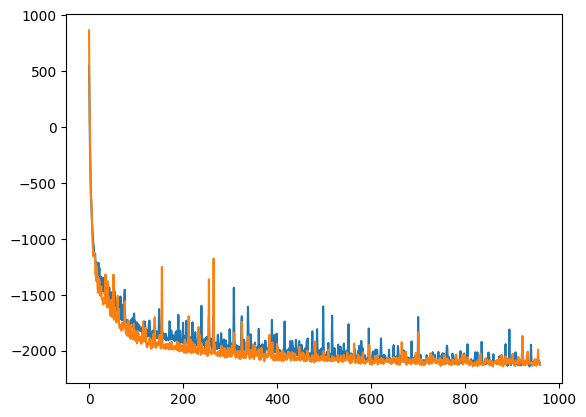

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.15655  validloss 4.38784±0.00000  bestvalidloss 4.38784  last_update 0
train: iter 1  trainloss 3.84829  validloss 4.03294±0.00000  bestvalidloss 4.03294  last_update 0
train: iter 2  trainloss 3.58129  validloss 3.74801±0.00000  bestvalidloss 3.74801  last_update 0
train: iter 3  trainloss 3.35649  validloss 3.49683±0.00000  bestvalidloss 3.49683  last_update 0
train: iter 4  trainloss 3.15495  validloss 3.28463±0.00000  bestvalidloss 3.28463  last_update 0
train: iter 5  trainloss 2.97873  validloss 3.08978±0.00000  bestvalidloss 3.08978  last_update 0
train: iter 6  trainloss 2.81893  validloss 2.91285±0.00000  bestvalidloss 2.91285  last_update 0
train: iter 7  trainloss 2.68036  validloss 2.76117±0.00000  bestvalidloss 2.76117  last_update 0
train: iter 8  trainloss 2.56047  validloss 2.62305±0.00000  bestvalidloss 2.62305  last_update 0
train: iter 9  trainloss 2.44271  validloss 2.50128±0.00000  bestvalidloss 2.50128  last_update 0
train: iter 10  trai

train: iter 86  trainloss -0.31954  validloss -0.88294±0.00000  bestvalidloss -0.89964  last_update 6
train: iter 87  trainloss -0.29831  validloss -0.91741±0.00000  bestvalidloss -0.91741  last_update 0
train: iter 88  trainloss -0.29119  validloss -0.88942±0.00000  bestvalidloss -0.91741  last_update 1
train: iter 89  trainloss -0.27994  validloss -0.88859±0.00000  bestvalidloss -0.91741  last_update 2
train: iter 90  trainloss -0.30381  validloss -0.91329±0.00000  bestvalidloss -0.91741  last_update 3
train: iter 91  trainloss -0.31024  validloss -0.92080±0.00000  bestvalidloss -0.92080  last_update 0
train: iter 92  trainloss -0.30510  validloss -0.90534±0.00000  bestvalidloss -0.92080  last_update 1
train: iter 93  trainloss -0.30054  validloss -0.91252±0.00000  bestvalidloss -0.92080  last_update 2
train: iter 94  trainloss -0.29400  validloss -0.90553±0.00000  bestvalidloss -0.92080  last_update 3
train: iter 95  trainloss -0.28011  validloss -0.91839±0.00000  bestvalidloss -0.9

train: iter 176  trainloss -0.30979  validloss -0.93919±0.00000  bestvalidloss -0.96594  last_update 12
train: iter 177  trainloss -0.30060  validloss -0.91472±0.00000  bestvalidloss -0.96594  last_update 13
train: iter 178  trainloss -0.31078  validloss -0.91542±0.00000  bestvalidloss -0.96594  last_update 14
train: iter 179  trainloss -0.29423  validloss -0.90297±0.00000  bestvalidloss -0.96594  last_update 15
train: iter 180  trainloss -0.27591  validloss -0.91514±0.00000  bestvalidloss -0.96594  last_update 16
train: iter 181  trainloss -0.29473  validloss -0.88395±0.00000  bestvalidloss -0.96594  last_update 17
train: iter 182  trainloss -0.29679  validloss -0.93108±0.00000  bestvalidloss -0.96594  last_update 18
train: iter 183  trainloss -0.28471  validloss -0.94007±0.00000  bestvalidloss -0.96594  last_update 19
train: iter 184  trainloss -0.30005  validloss -0.94467±0.00000  bestvalidloss -0.96594  last_update 20
train: iter 185  trainloss -0.30512  validloss -0.92545±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-2.0813, -0.7511, -3.2449, -3.0334], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 102.76296  validloss 116.41215±0.00000  bestvalidloss 116.41215  last_update 0
train: iter 1  trainloss 73.83728  validloss 87.47045±0.00000  bestvalidloss 87.47045  last_update 0
train: iter 2  trainloss 53.95296  validloss 62.15497±0.00000  bestvalidloss 62.15497  last_update 0
train: iter 3  trainloss 40.68923  validloss 46.49311±0.00000  bestvalidloss 46.49311  last_update 0
train: iter 4  trainloss 31.51271  validloss 35.36548±0.00000  bestvalidloss 35.36548  last_update 0
train: iter 5  trainloss 24.73403  validloss 27.88820±0.00000  bestvalidloss 27.88820  last_update 0
train: iter 6  trainloss 19.59544  validloss 21.65169±0.00000  bestvalidloss 21.65169  last_update 0
train: iter 7  trainloss 15.55096  validloss 17.42300±0.00000  bestvalidloss 17.42300  last_update 0
train: iter 8  trainloss 12.40358  validloss 13.74531±0.00000  bestvalidloss 13.74531  last_update 0
train: iter 9  trainloss 10.00669  validloss 10.82656±0.00000  bestvalidloss 10.82656  l

train: iter 83  trainloss 1.46865  validloss 2.69849±0.00000  bestvalidloss 2.34463  last_update 7
train: iter 84  trainloss 1.47933  validloss 2.86048±0.00000  bestvalidloss 2.34463  last_update 8
train: iter 85  trainloss 1.42970  validloss 2.89094±0.00000  bestvalidloss 2.34463  last_update 9
train: iter 86  trainloss 1.47598  validloss 2.34369±0.00000  bestvalidloss 2.34369  last_update 0
train: iter 87  trainloss 1.49539  validloss 2.57721±0.00000  bestvalidloss 2.34369  last_update 1
train: iter 88  trainloss 1.45328  validloss 2.68002±0.00000  bestvalidloss 2.34369  last_update 2
train: iter 89  trainloss 1.43387  validloss 2.79778±0.00000  bestvalidloss 2.34369  last_update 3
train: iter 90  trainloss 1.43400  validloss 2.55854±0.00000  bestvalidloss 2.34369  last_update 4
train: iter 91  trainloss 1.47192  validloss 2.56649±0.00000  bestvalidloss 2.34369  last_update 5
train: iter 92  trainloss 1.43770  validloss 2.74719±0.00000  bestvalidloss 2.34369  last_update 6
train: ite

train: iter 167  trainloss 1.41173  validloss 2.82712±0.00000  bestvalidloss 2.20472  last_update 13
train: iter 168  trainloss 1.40456  validloss 2.61753±0.00000  bestvalidloss 2.20472  last_update 14
train: iter 169  trainloss 1.42434  validloss 2.47144±0.00000  bestvalidloss 2.20472  last_update 15
train: iter 170  trainloss 1.40026  validloss 2.70911±0.00000  bestvalidloss 2.20472  last_update 16
train: iter 171  trainloss 1.38865  validloss 2.79769±0.00000  bestvalidloss 2.20472  last_update 17
train: iter 172  trainloss 1.37977  validloss 2.65935±0.00000  bestvalidloss 2.20472  last_update 18
train: iter 173  trainloss 1.40941  validloss 2.70135±0.00000  bestvalidloss 2.20472  last_update 19
train: iter 174  trainloss 1.38809  validloss 2.54502±0.00000  bestvalidloss 2.20472  last_update 20
train: iter 175  trainloss 1.39660  validloss 2.70669±0.00000  bestvalidloss 2.20472  last_update 21
train: iter 176  trainloss 1.41232  validloss 2.87801±0.00000  bestvalidloss 2.20472  last_

train: iter 250  trainloss 1.43659  validloss 2.35587±0.00000  bestvalidloss 2.20472  last_update 96
train: iter 251  trainloss 1.35903  validloss 2.55723±0.00000  bestvalidloss 2.20472  last_update 97
train: iter 252  trainloss 1.41125  validloss 2.59496±0.00000  bestvalidloss 2.20472  last_update 98
train: iter 253  trainloss 1.38023  validloss 3.08302±0.00000  bestvalidloss 2.20472  last_update 99
train: iter 254  trainloss 1.35827  validloss 3.03047±0.00000  bestvalidloss 2.20472  last_update 100
train: fin


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-9.1107)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.0174)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.1617433771263636
tensor([0.1972])
